In [91]:
# Set up the environment

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import tree

In [92]:
# importing data

penguins_df = pd.read_csv("https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/master/palmerpenguins/data/penguins-raw.csv")
penguins_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


![purple-divider](https://camo.githubusercontent.com/1d187452ac3929cfde8f5760b79f37cc117c1a332227d37a8c50db50d3db632a/68747470733a2f2f616c6c69736f6e686f7273742e6769746875622e696f2f70616c6d657270656e6775696e732f7265666572656e63652f666967757265732f6c7465725f70656e6775696e732e706e67)

In [93]:
penguins_df.shape

(344, 17)

In [94]:
penguins_df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [95]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

* Also the Date Egg column is object type. So, we have to convert that.

In [96]:
penguins_df['Date Egg'] = pd.to_datetime(penguins_df['Date Egg'])
penguins_df['Date Egg'] = pd.DatetimeIndex(penguins_df['Date Egg']).year

* Let's check out how much missing values are there in each column

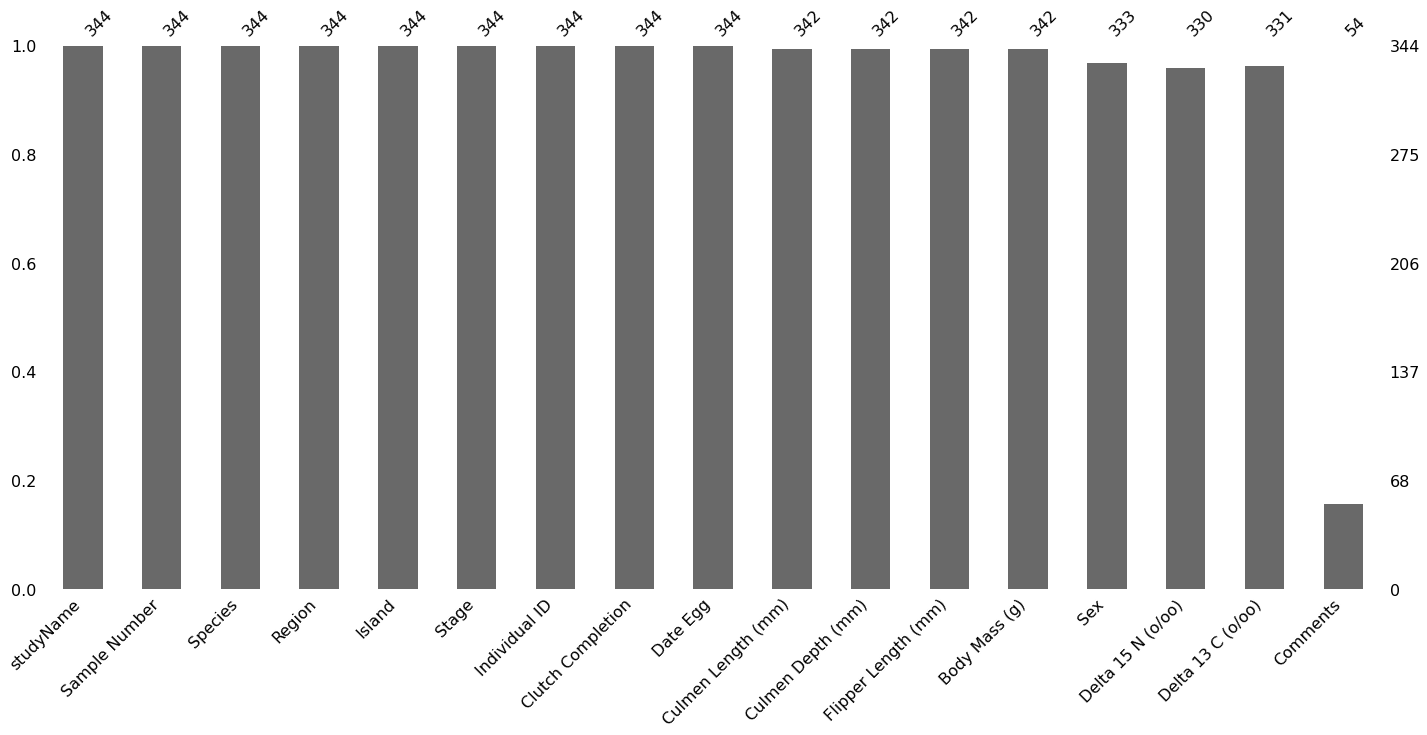

In [97]:
missingno.bar(penguins_df);

As we can see that COMMENTS column have the maximum missing values and I think we don't need it for further analysis so, I'm dropping it.
Also we don't need 

In [98]:
penguins_df.drop(['Comments','Delta 13 C (o/oo)','Delta 15 N (o/oo)','Clutch Completion','Individual ID','Stage','Region','Sample Number','studyName'], axis=1, inplace = True)

In [99]:
rename_col = {'Culmen Length (mm)':'bill_length_mm', 'Culmen Depth (mm)':'bill_depth_mm',
                              'Flipper Length (mm)':'flipper_length_mm','Date Egg': 'Year', 'Body Mass (g)': 'BodyMass'}
penguins_df.rename(columns = rename_col, inplace = True)

In [100]:
penguins_df.head()

,Species,Island,Year,bill_length_mm,bill_depth_mm,flipper_length_mm,BodyMass,Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,36.7,19.3,193.0,3450.0,FEMALE


In [101]:
penguins_df['Species']

0            Adelie Penguin (Pygoscelis adeliae)
1            Adelie Penguin (Pygoscelis adeliae)
2            Adelie Penguin (Pygoscelis adeliae)
3            Adelie Penguin (Pygoscelis adeliae)
4            Adelie Penguin (Pygoscelis adeliae)
                         ...                    
339    Chinstrap penguin (Pygoscelis antarctica)
340    Chinstrap penguin (Pygoscelis antarctica)
341    Chinstrap penguin (Pygoscelis antarctica)
342    Chinstrap penguin (Pygoscelis antarctica)
343    Chinstrap penguin (Pygoscelis antarctica)
Name: Species, Length: 344, dtype: object

In [102]:
penguins_df['Species'] = penguins_df["Species"].str.split(" ", n = 1, expand = True)[0]

In [103]:
import plotly.express as px

fig = px.box(penguins_df, x="Island", y="BodyMass", color="Species", color_discrete_sequence=['#FF8C00','#159090','#A034F0'])


fig.update_layout(
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [104]:
fig = px.scatter(penguins_df, x="flipper_length_mm", y="BodyMass",color="Species", color_discrete_sequence=['#FF8C00','#159090','#A034F0'], trendline="ols",width=800, height=600)


fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [108]:
# Set up variables for decision tree
penguins_full = penguins_df.dropna()

# feature selection
X = penguins_full[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm','BodyMass']]

# prediction target
y = penguins_full.Species


# seprate training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.3)

In [109]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [110]:
model.score(X_test,y_test)

0.9444444444444444

Text(33.0, 0.5, 'Truth')

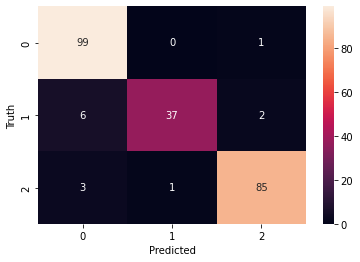

In [117]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred,labels=['Adelie','Chinstrap','Gentoo'])
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')